In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [6]:
import sys
sys.path.append('../')

import nets.maskrcnn.maskr as m
import nets.maskrcnn.angledataset as a
# import nets.maskrcnn.vgg19bridge as v

from sklearn.metrics import mean_squared_error

ImportError: cannot import name '_validate_lengths'

In [4]:
train, val, test = a.AngleDataset.createSets()
a.AngleDataset.show(train, 1)

NameError: name 'a' is not defined

In [5]:
a.AngleDataset.load_image(20)

NameError: name 'a' is not defined

In [173]:
maskrcnn = m.MaskR()

GPU available: True
Storing in  ../nets/maskrcnn/weights/perception4
Setup complete after 22.6111798286438 seconds


In [ ]:
vgg19 = v.VGG19Bridge()

In [174]:
maskrcnn.train(train, val, epochs=1)


Starting at epoch 0. LR=0.001

Checkpoint Path: ../nets/maskrcnn/weights/perception/stimuli20190302T2108/mask_rcnn_stimuli_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)

/n/pfister_lab/haehn/ENVS/maskr/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/n/pfister_lab/haehn/ENVS/maskr/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/1
100/100 [==============================] - 130s 1s/step - loss: 1.3053 - rpn_class_loss: 0.0587 - rpn_bbox_loss: 0.5384 - mrcnn_class_loss: 0.1178 - mrcnn_bbox_loss: 0.3026 - mrcnn_mask_loss: 0.2878 - val_loss: 0.9071 - val_rpn_class_loss: 0.0132 - val_rpn_bbox_loss: 0.4208 - val_mrcnn_class_loss: 0.0703 - val_mrcnn_bbox_loss: 0.1898 - val_mrcnn_mask_loss: 0.2131
Training complete after 276.2325041294098 seconds


uint8


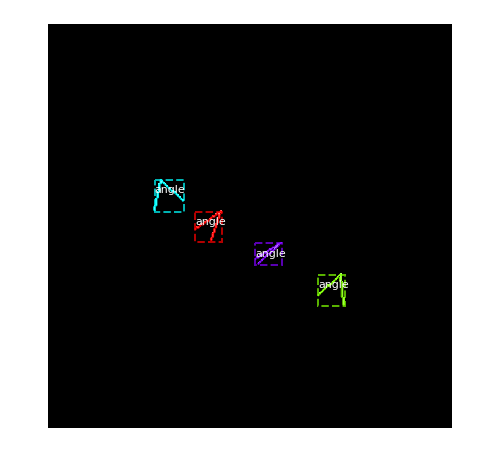

In [321]:
sys.path.append('../external/mask_rcnn/')

from mrcnn import model as modellib
from mrcnn import visualize
# import mask_rcnn.model as modellib
import nets.maskrcnn.config as C

original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(test, C.TestingConfig(), 10, use_mini_mask = False)
print(gt_mask.dtype)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            test.class_names, figsize=(8, 8))

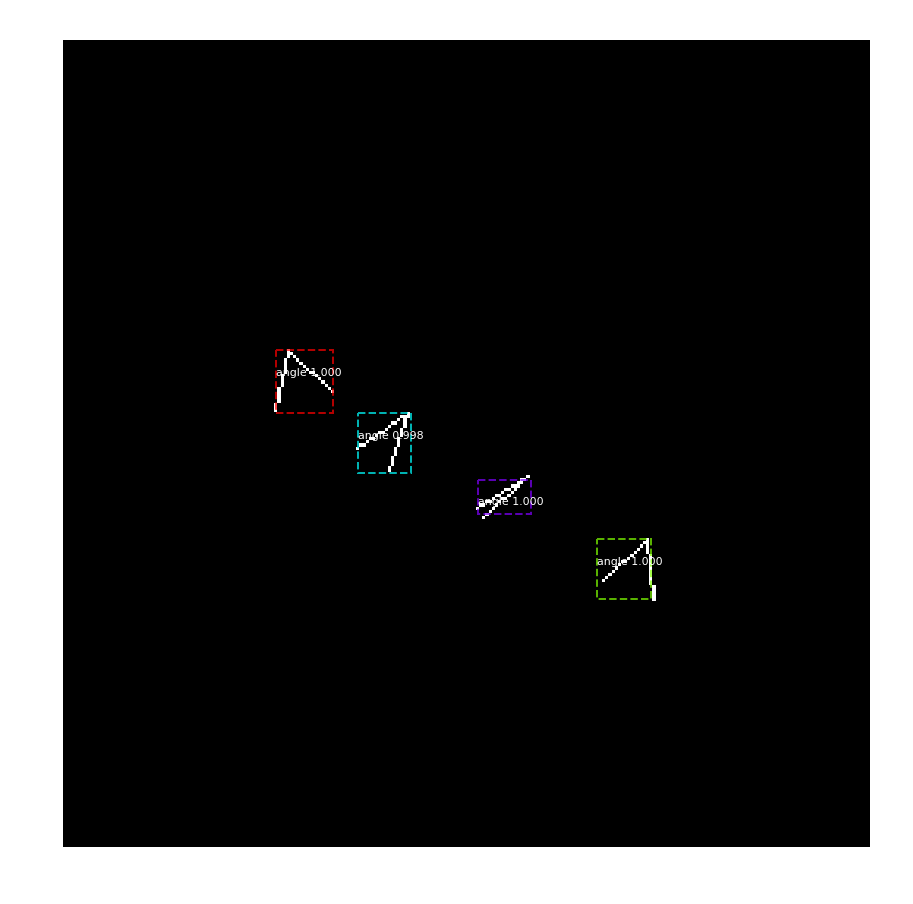

In [314]:
image = test.load_image(10)
y_test = test.image_info[10]['angles']
# images.append(image)
# y_tests.append(y_test)


maskrcnn_results = maskrcnn.predict([image], verbose=False)
# results = model.detect([original_image], verbose=1)

r = maskrcnn_results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            test.class_names, r['scores'])

In [319]:
r['masks'].dtype

dtype('bool')

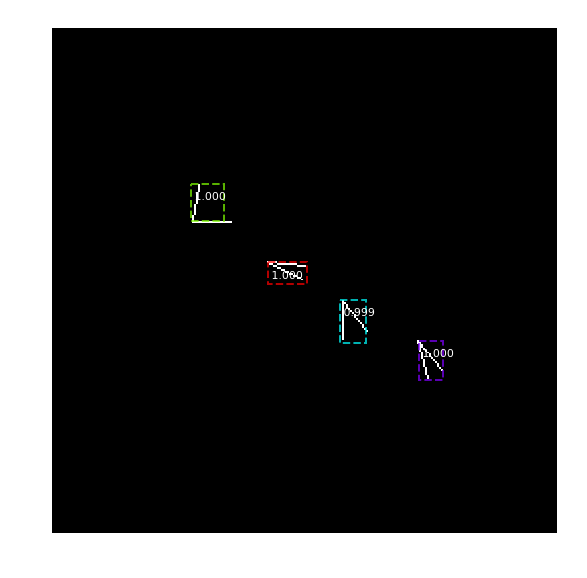

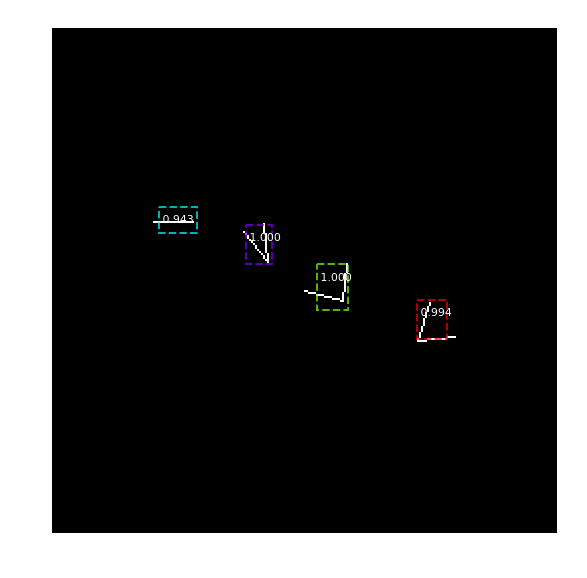

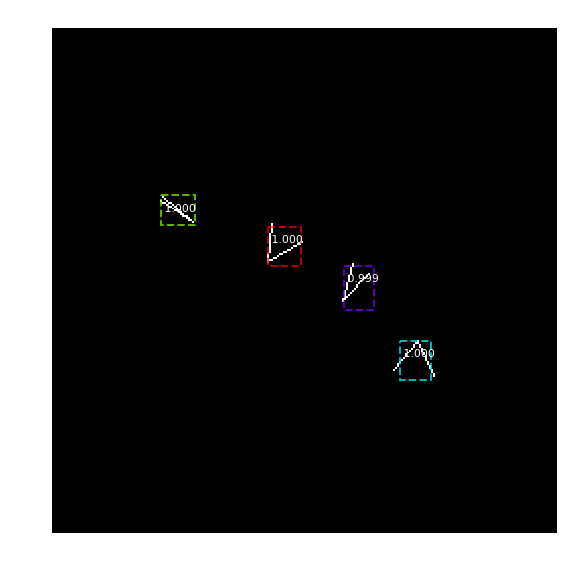

In [229]:
WHICH = [1,2,3]

images = []
y_tests = []
results = []
for w in WHICH:

    image = test.load_image(w)
    y_test = test.image_info[w]['angles']
    images.append(image)
    y_tests.append(y_test)
    
    
    maskrcnn_results = maskrcnn.predict([image])
    
    results.append(maskrcnn_results)

In [230]:
#
# grab the top4 rois and predict them with VGG19
#
y_preds = vgg19.predict(images, results)

Prediction complete after 0.12298917770385742


In [234]:
# GROUNDTRUTH
y_tests

[[78, 21, 37, 22], [1, 32, 81, 64], [5, 53, 28, 63]]

In [235]:
# PREDICTED WITH VGG19 VARIATION 2 (INCL X and Y movements)
y_preds

[[79.23730373382568,
  23.973243534564972,
  40.19492715597153,
  25.390563011169434],
 [1.807052493095398, 33.71893733739853, 80.47140955924988, 65.89855492115021],
 [6.43030509352684, 54.5589154958725, 32.06882357597351, 62.70928502082825]]

In [242]:
mse = []
for t,y_test in enumerate(y_tests):
    y_pred = y_preds[t]
    
    mse.append(mean_squared_error(y_test, y_pred))

In [245]:
np.mean(mse), np.std(mse)

(5.056700277065773, 2.514069857251327)

In [248]:
sys.path.append('../external/perception/EXP/ClevelandMcGill/')

In [249]:
from figure3 import Figure3

In [272]:
data, labels = Figure3.generate_datapoint()

In [295]:
piechart = Figure3.data_to_piechart(data)

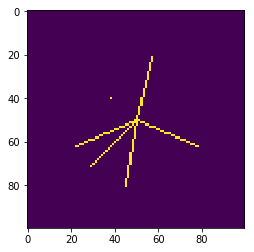

In [296]:
imshow(piechart)

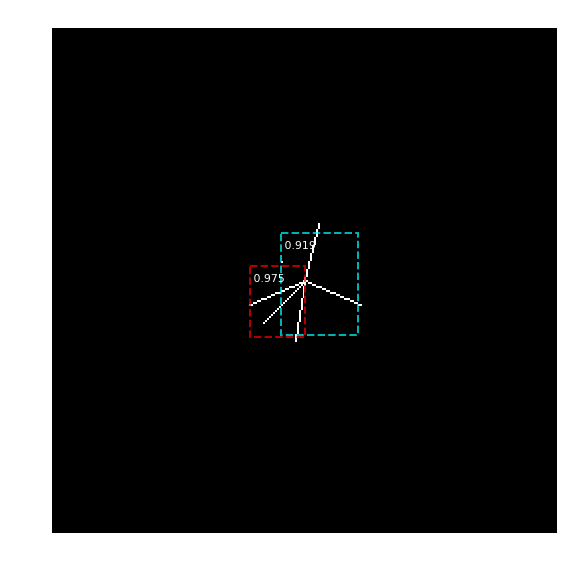

In [297]:
piechart_large = np.zeros((256,256,3), dtype=np.uint8)
piechart_large[128-50:128+50,128-50:128+50,0] = piechart
piechart_large[128-50:128+50,128-50:128+50,1] = piechart
piechart_large[128-50:128+50,128-50:128+50,2] = piechart

piechart_results = maskrcnn.predict([255*piechart_large])

In [266]:
piechart_results

[{'rois': array([[111, 105, 157, 149]], dtype=int32),
  'class_ids': array([1], dtype=int32),
  'scores': array([0.99202174], dtype=float32),
  'masks': array([[[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         ...,
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]]])}]

In [267]:
piechart_large.max()

1

In [ ]:
imshow(piechart)

In [324]:
(1,2,3) + (4,)

(1, 2, 3, 4)